In [70]:
from pyaxidraw import axidraw   # import module
from tqdm import tqdm

import matplotlib.pyplot as plt

import sys
from scipy.integrate import odeint
import numpy as np

In [71]:
ad = axidraw.AxiDraw()          # Initialize class
ad.interactive()                # Enter interactive context
ad.options.pen_pos_up = 70      # set pen-up position
ad.connect()                    # Open serial port to AxiDraw

True

In [28]:
ad.f_curr_y

0

In [72]:
ad.bounds = [[0.3,0.3],[10.5,8]]

In [73]:
ad.options.speed_pendown = 80

In [32]:
dx,dy = np.random.randn(2)*0.1

In [71]:
%%time
for i in range(1000):
    dx,dy = np.random.randn(2)*0.05
    ad.line(dx,dy)

CPU times: user 1.97 s, sys: 632 ms, total: 2.6 s
Wall time: 2min 52s


In [105]:
ad.bounds = [[0.5,0.5],[10,8]]

In [77]:
%%time
for i in range(500):
    dx,dy = np.random.randn(2)*0.1
    ad.line(dx,dy)

CPU times: user 838 ms, sys: 270 ms, total: 1.11 s
Wall time: 1min 17s


In [51]:
ad.moveto(0.11,0.11) 

In [74]:
ad.bounds=[[0.1,0.1],[10.9,8.4]]

In [75]:
ad.speed_pendown=10

In [76]:
# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 300, 60000

def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

In [85]:
xsc = (x - x.min()) 
xsc = xsc / xsc.max() * 9.5 + 0.5
ysc = (y - y.min())
ysc = ysc / ysc.max() * 7.5 + 0.5

xsc = xsc[30:]
ysc = ysc[30:]

In [67]:
xsc.min()

0.5

In [60]:
ad.speed_pendown

10

In [87]:
ad.moveto(round(xsc[0],2),round(ysc[0],2))

In [88]:
for _x,_y in tqdm(zip(xsc,ysc)):
    ad.lineto(round(_x,4),round(_y,4))
ad.moveto(0.5,0.5)

17370it [46:04,  3.46it/s]Failed after command: SM,25,-20,-1
17371it [46:05,  3.56it/s]
USB connection to AxiDraw lost.
59970it [46:06, 21.68it/s] 


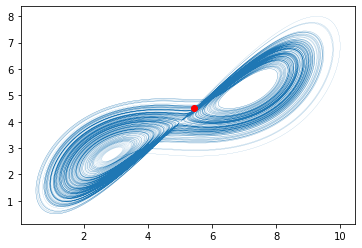

In [86]:
i=0
f,ax = plt.subplots()
ax.plot(xsc,ysc,alpha=1,linewidth=0.1)
ax.plot(xsc[i],ysc[i],'or')

In [89]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [90]:
# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

In [92]:
time_points

array([ 1.        ,  1.00983497,  1.01966994, ..., 59.98033006,
       59.99016503, 60.        ])

In [ ]:
current_state = initial_state

In [ ]:
lorenz_system(current_state)

In [82]:
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [83]:
# get incrementally larger chunks of the time points, to reveal the attractor one frame at a time
chunks = get_chunks(time_points, size=20)

In [85]:
# get the points to plot, one chunk of time steps at a time, by integrating the system of equations
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]